# Определение перспективного тарифа для телеком компании


Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 

Дана небольшая выборка клиентов - данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Задачи исследования - чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Оглавление

[Шаг 1. Открытие файла с данными и изучение общей информации](#step1)

[Шаг 2. Подготовка данных](#step2)

[Шаг 3. Анализ данных](#step3)

[Шаг 4. Проверка гипотез](#step4)

[Шаг 5. Общий вывод](#step5)

### Шаг 1. Открытие файла с данными и изучение общей информации <a name="step1"></a>

Для того, чтобы начать исследование, необходимо установить используемые в работе библиотеки, а также при необходимости обновить их:

In [1]:
#в ходе исследования возникла проблема в работе с библиотекой matplotlib - обновим версию
!pip install -U matplotlib --quiet 

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.6 MB 13.1 MB/s eta 0:00:01


In [2]:
#установим библиотеки, необходимые для исследования
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy import stats as st
import math

In [3]:
#прочтем файлы с исходным датасетами и запишем данные в датафреймы
df_users = pd.read_csv('/datasets/users.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_call = pd.read_csv('/datasets/calls.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv')

Посмотрим на исходные данные. Оптимизируем просмотр с помощью создания цикла, который будет показывать первые строки датафрейма и выводить информацию о качественных показателях каждого.

In [4]:
#создадим массив с названиями датасетов и их данными
all_df = [['пользователи', df_users], ['тарифы', df_tariffs], ['звонки', df_call], ['сообщения', df_messages], ['трафик', df_internet]]
#пропишем цикл, выводящий основную информацию о данных
for df_arr in all_df:
    print(f"\n**************Таблица: {df_arr[0]}**************\n")
    display(df_arr[1].head())
    print('\n**************Информация**************\n')
    print(df_arr[1].info())



**************Таблица: пользователи**************



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



**************Информация**************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

**************Таблица: тарифы**************



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



**************Информация**************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None

**************Таблица: звонки**************



,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



**************Информация**************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

**************Таблица: сообщения**************



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



**************Информация**************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

**************Таблица: трафик**************



,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



**************Информация**************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


### Вывод

Оценив визуально качественные характеристики исходных датасетов можно с уверенностью сказать, что необходима предварительная очистка и предобработка данных для дальнейшего анализа. Также с учетом поставленной задачи, неоходимо провести группировку таблиц и сведение их в одну общую со всей необходимой для анализа информацией.

Выявлены общие моменты, которые предстоит исправить для проведения дальнейшего анализа:

- *call_date*,*churn_date*,*reg_date*,*message_date*,*session_date* - привести к типу datetime (дата и время);

- столбцы *tariff* и tariff_name - привести к единому названию;

- столбец *id* переименовать в *message* для удобства использования в общей таблице.

Также проверить наличие и происходение пропусков, нулей и дубликатов в исходных данных.

### Шаг 2. Подготовка данных <a name="step2"></a>

Для эффективной подготовки данных к анализу первым шагом соберем таблицу, которую будем использовать в дальнейшем анализе и на ее основе уже будем производить очистку. Таблицу мы будем собирать по общим столбцам id пользователя (**'user_id'**) и месяца (**'month'**), проведя при этом группировку в исходных таблицах. Так мы сможем в одной таблице посчитать для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Для дальнейшего упрощения группировки и выявления номера месяца нам необходимо привести все даты и время в верный тип данных.

In [5]:
#переведем данные дат и времени в тип datetime64
df_call['call_date'] = pd.to_datetime(df_call['call_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

Переименуем определенные колонки в таблце **df_users** и **df_users**.

In [6]:
#переименуем колонки с помощью метода rename
df_users = df_users.rename(columns={"tariff": "tariff_name"})
df_messages = df_messages.rename(columns={"id": "message"})

Для группировки таблциц необходимо создать столбцы с номерами месяцев относительно совершенных пользователями действий.

In [7]:
#создадим столбцы месяца в исходных данных
df_call['month'] = df_call['call_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month

Так как по условию телекомкомпания «Мегалайн» всегда округляет вверх значения минут и мегабайтов, нам необходимо предварительно произвести округление данных минут и мегабайтов до целых значений вверх.

In [8]:
#произведем округление данных звонков в трафика до целых чисел вверх
df_call['duration'] = df_call['duration'].apply(lambda x: math.ceil(x))
df_internet['mb_used'] = df_internet['mb_used'].apply(lambda x: math.ceil(x))

Проведем группировку таблиц по пользователям и месяцам, чтобы в дальнейшем эффективно анализировать показатели.

In [9]:
#группируем таблицы по стобцам 'user_id' и 'month'
df_call_users = df_call.groupby(['user_id', 'month'])['duration'].sum().reset_index()
df_mesg_users = df_messages.groupby(['user_id', 'month'])['message'].count().reset_index()
df_net_users = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

После группировки таблиц мы можем провести совмещение данных в одну общую таблицу со всеми показателями.

In [10]:
#соединяем таблицы по значениям столбцов 'user_id' и 'month', а также 'tariff_name'
df_merged = df_call_users.merge(df_mesg_users, on=['user_id', 'month'], how='outer')  
df_merged = df_merged.merge(df_net_users, on=['user_id', 'month'], how='outer')  
df_merged = df_merged.merge(df_users, on='user_id', how='left')  
df_merged = df_merged.merge(df_tariffs, on='tariff_name', how='left')  
#посмотрим на получившуюся таблицу
df_merged.head()

,user_id,month,duration,message,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,32.0,17232.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,10,NaN,21.0,19588.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,11,NaN,20.0,17516.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,12,NaN,35.0,17341.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


В итоге у нас получилась большая общая таблица, которая содержит информацию о количестве совершенных звонков, отправленных сообщений и использованнног трафика каждого пользователя по месяцам, а также информацию о тарифе этого пользователя и его основных показателях.

Посмотрим на качественные показатели собранного датафрейма, а также проверим наличие пропусков и дубликатов.

In [11]:
#посмотрим на основные качественные показатели
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
duration                 3174 non-null float64
message                  2717 non-null float64
mb_used                  3203 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff_name              3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: dat

In [12]:
#проверим наличие пропусков
df_merged.isna().sum()

user_id                     0
month                       0
duration                   40
message                   497
mb_used                    11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [13]:
#произведем поиск дубликатов
df_merged.duplicated().sum()

0

Также на этапе ознакомления с предоставленной заказчиком информацие было обращено внимание на аспект, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Оценим их количество и его влияние на данные.

In [14]:
#процент нулевых значений длины разговора от общего количества 
print('Процент пропущенных звонков:',  (df_merged.query('duration == "0"')['duration'].count()/df_merged['duration'].count())*100)

Процент пропущенных звонков: 0.1890359168241966


Процент наличия пропущенных звонков (при отсутствии использования звонками, так как мы для анализа используем уже собранный из исходных данных датафрейм) составляет менее 1 процента всех пользователей, соответвенно влияние на качество данных у этого аспекта нет.

Типы данных в датасете верные, существуют пропуски в данных о продолжительности звонков, количестве отправленных сообщений и использованного трафика, а также большое количество пропусков в дате прекращения пользования тарифом. 

Причины возникновения пропусков могут быть разными. В данном случае относительно данных о действиях пользователей можно однохначно сказать, что не все пользователи используют все действия связи - кто-то исключительно звонит, кто-то не пишет смс, а пользуется веб-мессенжерами, так что возникновение данных пропусков не является ошибкой в данных. Также исходя из информации, предоставленной телекомкомпанией, "если значение в дате прекращения пользования тарифом пропущено, то тариф ещё действовал на момент выгрузки данных", из чего можем сделать вывод, что значительная часть пользователей на момент выгрузки данных еще пользовались обозначенными тарифами.

На основании выявленных причин возникновения пропусков и для эффективности дальнейшего анализа проведем замену пропусков в столбцах с данными о действиях пользователей на нули.

In [15]:
#замена пропусков в столбцах на нули
df_merged['duration'] = df_merged['duration'].fillna(0) 
df_merged['message'] = df_merged['message'].fillna(0) 
df_merged['mb_used'] = df_merged['mb_used'].fillna(0) 

Для полных данных в таблице нам необходимо посчитать помесячную выручку с каждого пользователя. Для этого создадим столбец, в который запишем данные о выруче. Чтобы их найти создадим функцию, которая по условиям будет: вычтитать бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножать на значение из тарифного плана и прибавлять абонентскую плату, соответствующую тарифному плану.

In [16]:
#функция для подсчета выручки
def month_revenue(row):    
    if row['duration'] < row['minutes_included']:
        calls_revenue = 0
    else:
        calls_revenue = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
 
 
    if row['message'] < row['messages_included']:
        message_revenue = 0
    else:
        message_revenue = (row['message'] - row['messages_included']) * row['rub_per_message'] 
 
 
    if row['mb_used'] < row['mb_per_month_included']:
        internet_revenue = 0
    else:
        internet_revenue = (row['mb_used'] - row['mb_per_month_included']) / 1024 * row['rub_per_gb']
 
 
    total_revenue =  row['rub_monthly_fee'] + calls_revenue + message_revenue + internet_revenue
    return total_revenue
#сощдадим столбец выручки и применим функцию 
df_merged['month_revenue'] = df_merged.apply(month_revenue, axis = 1)
#округлим значения выручки
df_merged['month_revenue'] = df_merged['month_revenue'].round()
#посмотим на собранные данные
df_merged.head()

,user_id,month,duration,message,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_revenue
0,1000,5,159.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,172.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,340.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,408.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,466.0,57.0,14581.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,32.0,17232.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,916.0
3210,1489,10,0.0,21.0,19588.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,1376.0
3211,1489,11,0.0,20.0,17516.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,971.0
3212,1489,12,0.0,35.0,17341.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,937.0


Данные собраны верно - теперь информация полная. Для дальнейшего анализа нам не понадобятся столбцы **churn_date** и **reg_date** - можем их удалить.

In [17]:
#удаление столбцов
df_merged = df_merged.drop(['churn_date', 'reg_date'], axis=1)

### Вывод

В ходе этапа "Подготовка данных" было проведено: 

- замена типа данных в столбцах даты и времени; 

- переименование столбцов; 

- группировка исходных данных, их сбор в единую таблицу и создание новых данных;

- обнаружение и замена пропущенных значений. 

Относительно ситуации с пропущенными значениями - вероятней всего предположить, что пропуски возникли в результате поведенческих факторов и предпочтений пользователей, а также обоснованных форм методологии при выгрузке (данные о пользовании тарифом на момент выгрузки).

### Шаг 3. Анализ данных <a name="step3"></a>

На данном этапе необходимо проанализировать поведение пользователей какое количество минут разговора, сообщений и объема интернет-трафика требуется пользователям каждого тарифа в месяц. 

Для данного анализа нам необходимо данные разделить исходя из названий тарифов, к которым относятся пользователи и в дальнейшем исследовать данные в разрезе тарифов. Создадим таблицы с данными по каждому тарифу.

In [18]:
#таблицы с выборкой данных по каждому тарифу
df_ultra = df_merged.query('tariff_name == "ultra"')
df_smart = df_merged.query('tariff_name == "smart"')

Изучим пользователей каждой выборки, чтобы оценить их дальнейшее сопоставление. Для этого создадим функцию, которая будет считать средний возраст пользователя, а также его процент пользования предоставляемыми тарифными планами услугами.

In [19]:
#функция для подсчета данных о среднем пользователе тарифа
def info_users(df):    
    print('Количество пользователей тарифа:', df['user_id'].count(), ' человек')
    print('Средний возраст пользователя:', df['age'].mean().round(1), 'лет')
    print('Среднее количество звонков:', df['duration'].mean().round(1))
    print('Процент использования звонков в тарифе:', ((df['duration'].mean()/df['minutes_included'].mean())*100).round(1), '%')
    print('Среднее количество сообщений:', df['message'].mean().round(1))
    print('Процент использования сообщений в тарифе:', ((df['message'].mean()/df['messages_included'].mean())*100).round(1), '%')
    print('Среднее количество трафика:', df['mb_used'].mean().round(1))
    print('Процент использования трафика в тарифе:', ((df['mb_used'].mean()/df['mb_per_month_included'].mean())*100).round(1), '%')
#выведем информацию для сразвнения    
print('Тариф ultra:')    
print(info_users(df_ultra))
print('Тариф smart:')  
print(info_users(df_smart))

Тариф ultra:
Количество пользователей тарифа: 985  человек
Средний возраст пользователя: 46.8 лет
Среднее количество звонков: 526.6
Процент использования звонков в тарифе: 17.6 %
Среднее количество сообщений: 49.4
Процент использования сообщений в тарифе: 4.9 %
Среднее количество трафика: 19486.9
Процент использования трафика в тарифе: 63.4 %
None
Тариф smart:
Количество пользователей тарифа: 2229  человек
Средний возраст пользователя: 46.6 лет
Среднее количество звонков: 417.9
Процент использования звонков в тарифе: 83.6 %
Среднее количество сообщений: 33.4
Процент использования сообщений в тарифе: 66.8 %
Среднее количество трафика: 16229.2
Процент использования трафика в тарифе: 105.7 %
None


Глядя на данные, можно отметить, что тариф **smart почти в 2,5 раза популярнее** среди пользователей, чем тариф ultra. При этом **средний возраст пользователей одинаков** и равено 47 годам. Также можно сказать, что пользователи обоих тарифов активно используют трафик интернета, предоставленный тарифом, для связи - 64% трафика ultra и 106% smart - при этом **пользователи тарифа smart переплачивают за** переиспользованный **трафик** свыше абонентской платы. В среднем пользователи тарифа ultra совершают больше действий, чем пользователи тарифа smart, однако первые вмещают свои действия в пакет, предоставленный тарифом, в отличие вторых, которые используют тариф почти по максимуму или иногда даже сверх него.

Наглядно посмотрим на распределение отношений данных по двум тарифам по основным действиям пользователей (звонки, смс, трафик). Для создадим функцию, которая будет строить графики распределений каждого значения по месяцам. Сгруппируем данные для визуализации.

In [20]:
#создадим таблицы со сгруппированными данными по месяцам
df_smart_gb = df_smart.groupby('month')['month', 'duration', 'message', 'mb_used'].mean()
df_ultra_gb = df_ultra.groupby('month')['month', 'duration', 'message', 'mb_used'].mean()

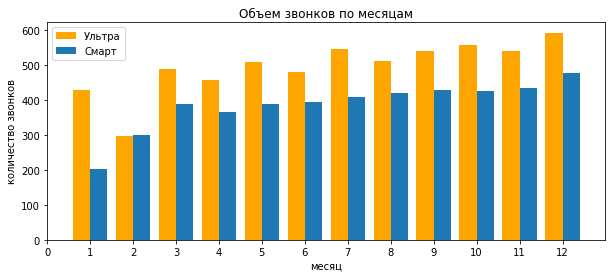

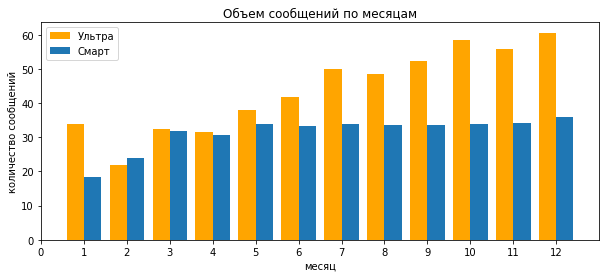

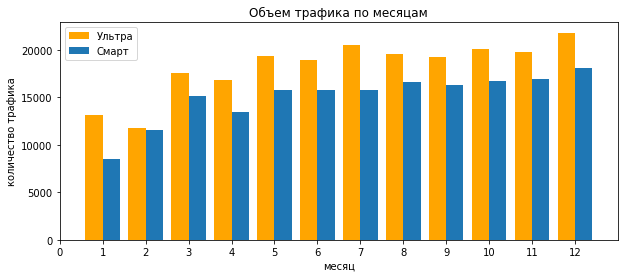

In [21]:
#функция для визуализации распределения отношений данных пользователей тарифов
def bar_stat(df1, df2):
    columns = [['duration', 'Объем звонков по месяцам', 'количество звонков'], ['message', 'Объем сообщений по месяцам', 'количество сообщений'], ['mb_used', 'Объем трафика по месяцам', 'количество трафика']]
    for column in columns:
       
        x1=df1['month']-0.2
        x2=df2['month']+0.2
        y1=df1[column[0]]
        y2=df2[column[0]]

        fig, ax = plt.subplots()

        ax.bar(x1, y1, width=0.4, color='orange')
        ax.bar(x2, y2, width=0.4)

        fig.set_figwidth(10)
        fig.set_figheight(4)
        ax.set_xticks(np.arange(len(df1['month'])+1))
        ax.set_title(column[1])
        ax.set_ylabel(column[2])
        ax.set_xlabel('месяц')
        ax.legend(['Ультра', 'Смарт'])
        plt.show()
        
#вопользуемся функцией для визуализации соотношения             
bar_stat(df_ultra_gb, df_smart_gb)

Наглядно видно, что пользователи тарифа ultra совершают больше действий связи, чем пользователи тарифа smart. Можно отметить, что в феврале пользователи не охотно общаются относительно остальных месяцев, а в декабре можно заметить повышение активности использования связи, которое может быть связано с предпразничным настроением и желанием побольше общаться. Также в течении всего года сообщения среди пользователей тарифа smart почти не подвержены колебаниям.

Посчитаем среднее количество, дисперсию и стандартное отклонение по пользовательским действиям по каждому тарифу. Для этого создадим функцию, которая будет считать показатели и визуализировать их распределение с помощью гистограммы.

In [22]:
#функция для подсчета среднего, дисперсии и стандартного отклонения и построения гистрограммы
def descriptive_stat(data):
    columns = [['duration', 'объем звонков', 'Количество звонков'], ['message', 'объем сообщений', 'Количество сообщений'], ['mb_used','объем трафика', 'Количество трафика']]
    for column in columns:
        print(column[1])
        print('Среднее:', data[column[0]].mean().round(1))
        print('Дисперсия:', np.var(data[column[0]]).round(1))
        print('Ст.отклонение:', np.sqrt(np.var(data[column[0]])).round(1))
        print(data.plot(kind='hist', y=column[0], bins=20, linewidth=5, figsize= (10, 4), grid=True, label=column[2]).set_xlabel(column[1]))
        plt.show()

По тарифу  Ultra:

объем звонков
Среднее: 526.6
Дисперсия: 100771.2
Ст.отклонение: 317.4
Text(0.5, 0, 'объем звонков')


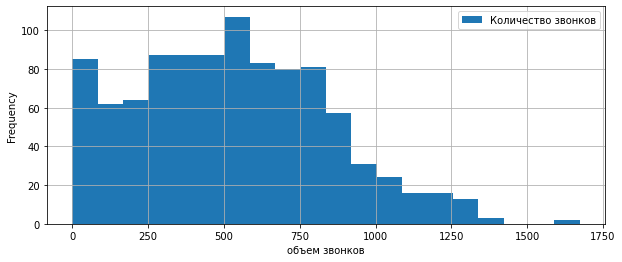

объем сообщений
Среднее: 49.4
Дисперсия: 2282.9
Ст.отклонение: 47.8
Text(0.5, 0, 'объем сообщений')


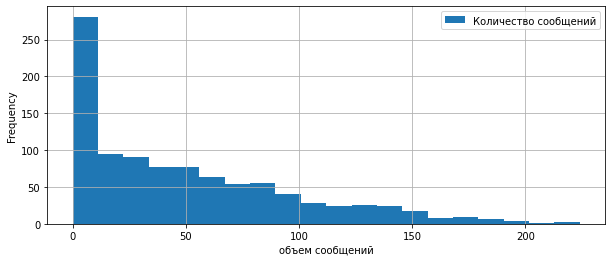

объем трафика
Среднее: 19486.9
Дисперсия: 101832133.1
Ст.отклонение: 10091.2
Text(0.5, 0, 'объем трафика')


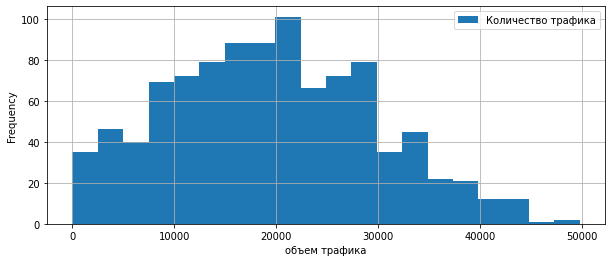

In [23]:
#выведем данные по тарифу ultra
print('По тарифу  Ultra:\n') 
descriptive_stat(df_ultra)

По тарифу Smart:

объем звонков
Среднее: 417.9
Дисперсия: 36203.1
Ст.отклонение: 190.3
Text(0.5, 0, 'объем звонков')


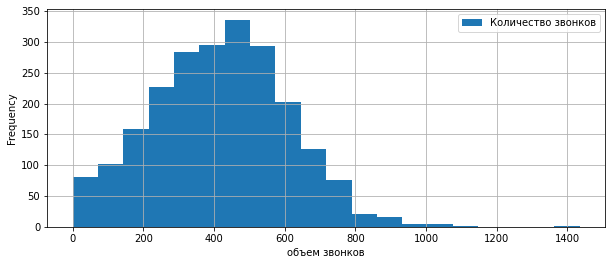

объем сообщений
Среднее: 33.4
Дисперсия: 796.5
Ст.отклонение: 28.2
Text(0.5, 0, 'объем сообщений')


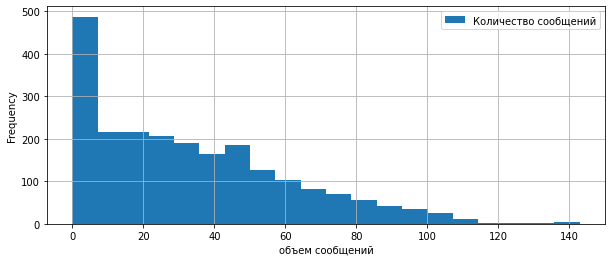

объем трафика
Среднее: 16229.2
Дисперсия: 34530412.7
Ст.отклонение: 5876.3
Text(0.5, 0, 'объем трафика')


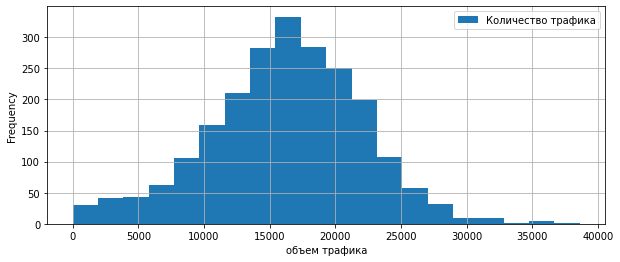

In [24]:
#выведем данные по тарифу smart
print('По тарифу Smart:\n') 
descriptive_stat(df_smart)

Исходя из полученных результатов можем отметить, что распределение данных нормальное, но ассиметричное. Например по данным о использовании звонков можно сказать, что график имеют отрицательную скошенность, значит большее количество пользователей умещают разговоры в 500 минут. Аналогичное представление дают данные о пользователях тарифа smart. 

### Вывод

В ходе этапа "Подготовка данных" было проанализированно поведение пользователей каждого тарифа в месяц.

Выявлено, что:
- тариф **smart почти в 2,5 раза популярнее** среди пользователей, чем тариф ultra;
- **средний возраст пользователей одинаков** и равено 47 годам;
- **пользователи тарифа smart переплачивают за** переиспользованный **трафик** свыше предоставленного в пакете; 
- на графиках распределения выявлено, что в среднем пользователи тарифа ultra совершают больше действий, чем пользователи тарифа smart
- в феврале пользователи не охотно общаются относительно остальных месяцев, а в декабре можно заметить повышение активности использования связи, которое может быть связано с предпразничным настроением и желанием побольше общаться.

Также были посчитаны среднее количество, дисперсия и стандартное отклонение по пользовательским действиям по каждому тарифу. 
Исходя из полученных результатов можем отметить, что распределение данных по тарифам нормальное, но имеется скошенность данных. 

### Шаг 4. Проверка гипотез <a name="step4"></a>

На данном этапе анализа проведем исследование нескольких гипотез и ответим на вопросы: отличается ли средняя выручка пользователей разных тарифов и зависит ли выручка от территориального аспекта. Для это поочереди проверим гипотезы и сформулируем выводы.

**Гипотеза 1** 

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

**Нулевая гипотеза** - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается, т.е. одинакова.
**Альтернативная гипотеза** - средняя выручка пользователей тарифа «Ультра» отличается от средней выручки пользователей тарифа «Смарт».

Для начала сравним дисперсии выборок, чтобы принять решение об их равенстве или неравенстве для выбора параметра equal_var (равенства дисперсий выборок).

In [25]:
#создадим условия для сравнения дисперсий выборок
if (np.var(df_ultra['month_revenue']).round(1) == np.var(df_smart['month_revenue']).round(1)):
    print('Дисперсии равны, необходимо использовать equal_var = True')
else:
    print('Дисперсии не равны, необходимо использовать equal_var = False')

Дисперсии не равны, необходимо использовать equal_var = False


Для проверки данной гипотезы равенства двух независимых совокупностей используем метод scipy.stats.ttest_ind <span style="color:blue"> - статистический критерий Стьюдента, потому что данные представляют собой независимые друг от друга выборки.</span> На основании сравнения дисперсий выборок параметр **equal_var** зададим **False**, потому что дисперсии выборок не равны. Критический уровень статистической значимости обозначим в 1%.

In [26]:
#задаем критический уровень статистической значимости
alpha = 0.01
#проведем анализ с помощью метода st.ttest_ind
results = st.ttest_ind(df_ultra['month_revenue'], df_smart['month_revenue'], equal_var = False)
#выведем полученное значение
print('p-значение: ', results.pvalue)
#сравним полученное значение с заданным уровнем значимости и выведем результат
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  8.911718216988335e-296
Отвергаем нулевую гипотезу


Соответсвенно полученному значению можно сказать, что мы отвергаем нулевую гипотезу и средняя выручка пользователей тарифа «Ультра» отличается от средней выручки пользователей тарифа «Смарт». Насколько сильно отличается она - больше или меньше на основании данной проверки сказать невозможно, но само отличие неоспоримо.

Попробуем проверить каково же различие в выручке этих двух тарифов и какой тариф приносит больше денег телекомкомпании.

In [27]:
#создадим переменные для расчета средней выручки 
mean_revenue_u = df_ultra['month_revenue'].mean().round(1)
mean_revenue_s = df_smart['month_revenue'].mean().round(1)
#выведем показатели средней выручки и их отношения
print('Средняя выручка по тарифу Ultra:', mean_revenue_u, 'руб.')
print('Средняя выручка по тарифу Smart:', mean_revenue_s, 'руб.')
print('Средняя выручка по тарифу Ultra больше средней выручки по тарифу Smart в', (mean_revenue_u/mean_revenue_s).round(1), 'раза или на', (mean_revenue_u-mean_revenue_s).round(1), 'руб.')

Средняя выручка по тарифу Ultra: 2060.5 руб.
Средняя выручка по тарифу Smart: 1233.4 руб.
Средняя выручка по тарифу Ultra больше средней выручки по тарифу Smart в 1.7 раза или на 827.1 руб.


На основании анализа можно однозначно сказать, что **средняя выручка тарифа «Ультра» больше** средней выручки пользователей тарифа «Смарт» **в 1,7 раза**.

**Гипотеза 2** 

- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Нулевая гипотеза** - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, т.е. выручки на этих территориях одинаковы.
**Альтернативная гипотеза** - территория нахождения пользователей влияет на среднюю выручку.

Сначала создадим выборки по территориальному признаку - живет пользователь в Москве или вне Москвы.

In [28]:
#создадим выброрки относительно территории
df_moscow = df_merged.query('city == "Москва"')
df_region = df_merged.query('city != "Москва"')

Cравним дисперсии выборок, чтобы принять решение об их равенстве или неравенстве для выбора параметра equal_var (равенства дисперсий выборок).

In [29]:
#создадим условия для сравнения дисперсий выборок
if (np.var(df_moscow['month_revenue']).round(1) == np.var(df_region['month_revenue']).round(1)):
    print('Дисперсии равны, необходимо использовать equal_var = True')
else:
    print('Дисперсии не равны, необходимо использовать equal_var = False')

Дисперсии не равны, необходимо использовать equal_var = False


Для проверки данной гипотезы равенства двух независимых совокупностей используем метод scipy.stats.ttest_ind <span style="color:blue"> - статистический критерий Стьюдента, потому что данные представляют собой независимые друг от друга выборки.</span> На основании сравнения дисперсий выборок параметр **equal_var** зададим **False**, потому что дисперсии выборок не равны. Критический уровень статистической значимости обозначим в 1%.

In [30]:
#задаем критический уровень статистической значимости
alpha = 0.01
#проведем анализ с помощью метода st.ttest_ind
results = st.ttest_ind(df_moscow['month_revenue'], df_region['month_revenue'], equal_var = False)
#выведем полученное значение
print('p-значение: ', results.pvalue)
#сравним полученное значение с заданным уровнем значимости и выведем результат
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.45489046098064356
Не получилось отвергнуть нулевую гипотезу


На основании полученных данных можно сказать, что средняя выручка от пользователя услугами телекомкомпании не зависит от территориального нахождения пользователей.

### Вывод

На этапе "Проверка гипотез" мы обнаружили, что:

- **средняя выручка тарифа «Ультра» больше** средней выручки пользователей тарифа «Смарт» **в 1,7 раза** или на 827.1 руб.;

- средняя выручка от пользователя услугами телекомкомпании не зависит от территориального нахождения пользователей.

### Шаг 5. Общий вывод <a name="step5"></a>

Задачи исследования - чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


При оценке данных было выявлено, что имеются отклонения в данных и их необходимо предварительно обработать для дальнейшего совмещения.
В ходе работы была произведена замена типа данных, работа с названиями столбцов, обработка пропущенных значений, также исходные данные сгруппированы и собраны в единый датасет для удобства анализа. Собраны данные по каждому пользователю в разрезе месяцов и посчитана выручка.
В ходе анализа и проверки гипотез были выявлены основные поведенческие аспекты пользователей двух тарифов, которые прямым образом влияют на выручку:

- тариф **«Смарт» почти в 2,5 раза популярнее** среди пользователей, чем тариф «Ультра»;
- **средний возраст пользователей** тарифов **одинаков** и равено 47 годам;
- **пользователи тарифа «Смарт» переплачивают за** переиспользованный **трафик**, предоставленный в пакете; 
- в среднем пользователи тарифа «Ультра» совершают используют больший объем услуг связи, чем пользователи тарифа «Смарт»;
- в феврале пользователи не охотно общаются относительно остальных месяцев, а в декабре можно заметить повышение активности использования связи, которое может быть связано с предпразничным настроением и желанием побольше общаться.
- территориального нахождения пользователей не влияет на размер выручки.

На основании проведенного исследования можно заключить, что тариф «Ультра» при меньшем количестве пользователей в среднем приносит выручки в 1,7 раза больше, чем тариф «Смарт», а также наиболее выгоден для пользователей с точки зрения объема предоставляемых услуг.